In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydot
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Deep learning lib

In [3]:
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Activation
from keras.datasets import mnist

In [4]:
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [14]:
train_images.shape

(60000, 28, 28)

In [33]:
train_labels.shape

(60000,)

In [22]:
test_images.shape

(10000, 28, 28)

In [34]:
test_labels.shape

(10000,)

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

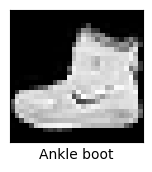

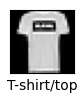

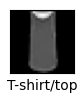

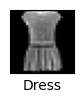

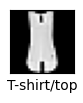

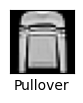

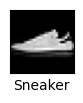

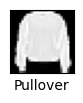

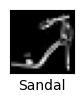

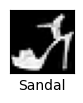

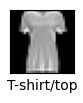

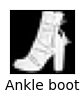

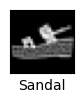

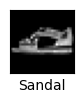

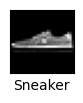

In [37]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(train_images[i],cmap="gray")
    plt.xlabel(class_names[train_labels[i]])
    
    
    plt.show()

In [46]:
x_train=train_images.reshape(60000,784)
x_test=test_images.reshape(10000,784)

In [47]:
y_train=to_categorical(train_labels,num_classes=10)
y_test=to_categorical(test_labels,num_classes=10)

In [48]:
x_train.shape

(60000, 784)

In [49]:
y_train.shape

(60000, 10)

In [70]:
model=keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                      

In [72]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [73]:
history=model.fit(x_train,y_train,batch_size=100,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
600/600 [==============================] - 7s 8ms/step - loss: 0.7693 - acc: 0.7366 - val_loss: 0.4875 - val_acc: 0.8166
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.5335 - acc: 0.8164 - val_loss: 0.4498 - val_acc: 0.8356
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.4990 - acc: 0.8248 - val_loss: 0.4424 - val_acc: 0.8419
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.4774 - acc: 0.8334 - val_loss: 0.4543 - val_acc: 0.8507
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.4581 - acc: 0.8406 - val_loss: 0.4224 - val_acc: 0.8525
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.4367 - acc: 0.8476 - val_loss: 0.4460 - val_acc: 0.8546
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.4373 - acc: 0.8470 - val_loss: 0.4246 - val_acc: 0.8582
Epoch 8/20
600/600 [==============================] - 4s 7ms/step - loss: 0.

In [77]:
y_predict=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [78]:
y_predict=np.argmax(y_predict,axis=1)#predict value
y_test_eval=np.argmax(y_test,axis=1)#actual value

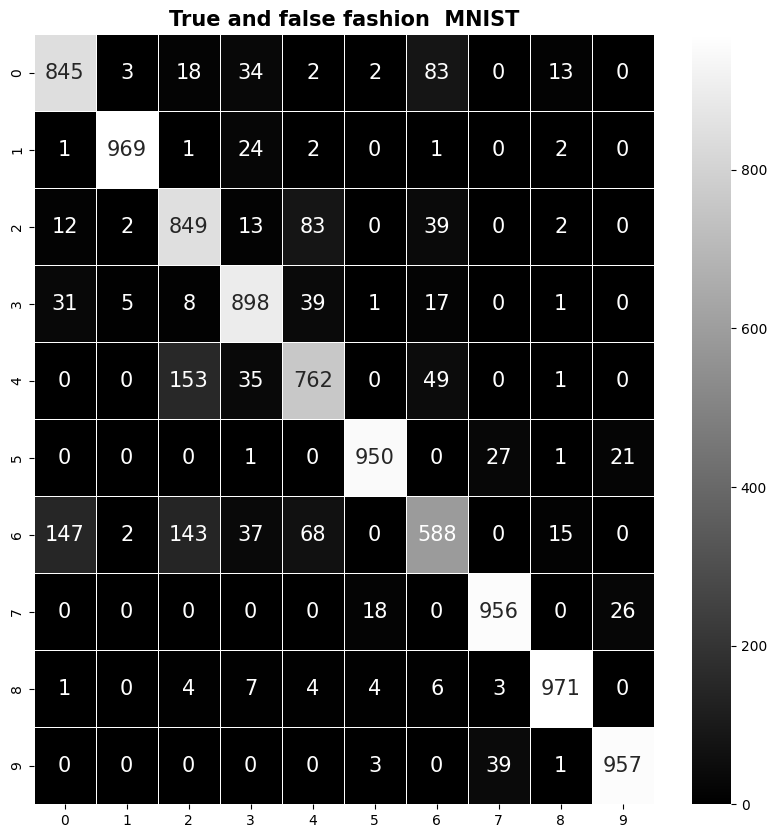

In [85]:
con_mat=confusion_matrix(y_test_eval,y_predict)#find th confusion matrix actual and predict value
#plt.style.use('seaborn_deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt='d',cmap='gray')
plt.title("True and false fashion  MNIST",fontsize=15,fontweight='bold')
plt.show()

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test_eval,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.72      0.85      0.78      1000
           3       0.86      0.90      0.88      1000
           4       0.79      0.76      0.78      1000
           5       0.97      0.95      0.96      1000
           6       0.75      0.59      0.66      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



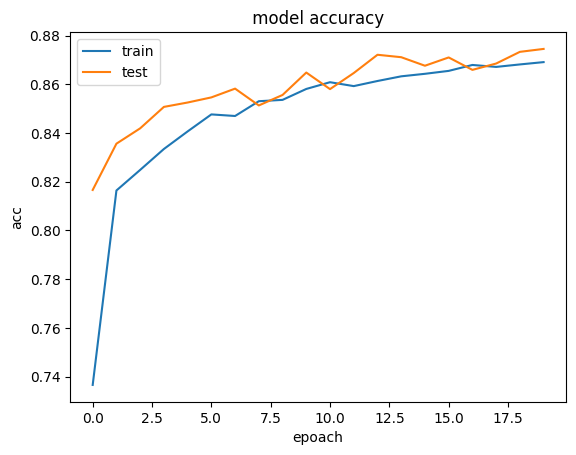

In [87]:
h=history
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(["train","test"],loc='best')
plt.xlabel("epoach")
plt.ylabel("acc")
plt.title(" model accuracy ")
plt.show()

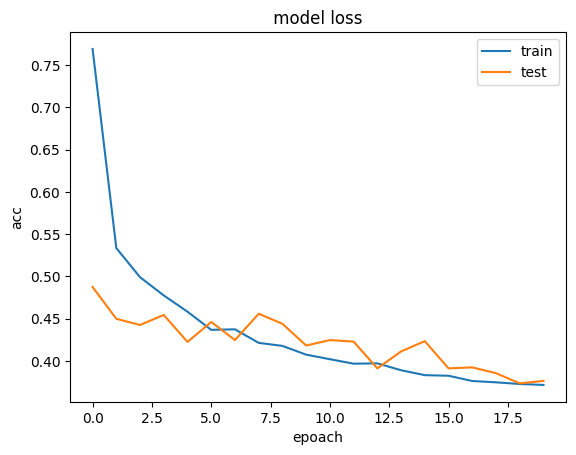

In [88]:
h=history
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(["train","test"],loc='best')
plt.xlabel("epoach")
plt.ylabel("acc")
plt.title(" model loss ")
plt.show()

In [89]:
y_predict_single=model.predict(x_test[[8]])
y_predict_single=np.argmax(y_predict_single,axis=1)
y_test_eval=np.argmax(y_test,axis=1)


1/1 [==============================] - 0s 47ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

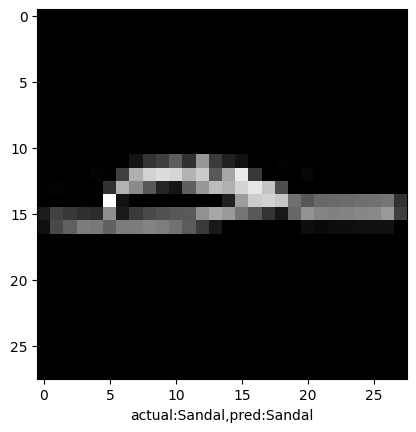

In [90]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(x_test[8].reshape(28,28),cmap="gray")
plt.xlabel("actual:{},pred:{}".format(class_names[np.argmax(y_test[8])],class_names[y_predict_single[0]]))
plt.show